In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn. preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
import tensorflow as tf
import os

In [2]:
import cv2
import matplotlib.pyplot as plt

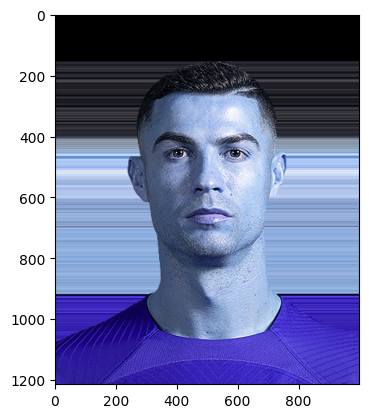

In [3]:
img = cv2.imread('C:\\programowanie\\python\\Jupyter_nauka\\Projekty\\6_Projekt_People_recognition\\model\\images_dataset\\Ronaldo\\885.png')
img.shape
plt.imshow(img,)

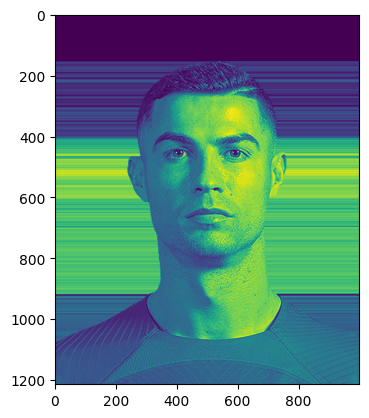

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

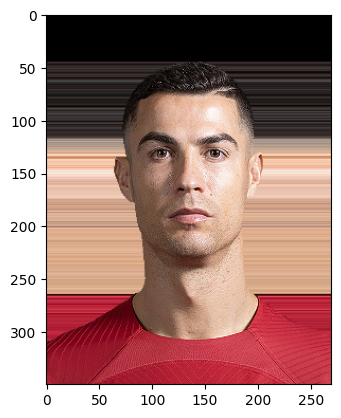

In [5]:
RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGB = cv2.resize(RGB,(270,350))
plt.imshow(RGB)
